# Project: Investigation of IMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
# This data set contains information
# about 10,000 movies collected from
# The Movie Database (TMDb),
# including user ratings and revenue.

# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt

# Questions that would be explored through the course of this report include:
# 1) What genres are most popular from year to year?
# 2) What are the parameters that contribute to revenue generation?
# 3) What kind of properties are associated with the movies that have high revenues?


## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
m_df = pd.read_csv('tmdb-movies.csv')
m_df.head()
#   types and look for instances of missing or possibly errant data.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
m_df.shape

(10866, 21)

In [4]:
sum(m_df.duplicated())

1

In [5]:
m_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
m_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
m_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### DATA CLEANING.

### This includes:
### 1) Dropping extraneous columns:
### Dropping features that are not relevant to our questions using panda's drop function.
### 2) Adjusting some column values:
### Replacing the "\" in the cast and genre values with "," to allow for easy analysis.
### 3) Dropping rows in the dataset that contain missing values:
### This is to reduce bias in the estimation of parameters and eliminate reduction of statistical power.
### 4) Dropping any duplicate rows in the dataset:
### Removing multiple instances of records in order to prepare the dataset for additional processing.

In [9]:
# Removing extraneous columns such as homepage, tagline, production companies, keywords and overview
m_df. drop(['homepage', 'tagline', 'keywords', 'production_companies', 'director', 'overview'], axis = 1, inplace = True)

In [10]:
# Checking to confirm that the columns have been removed
m_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
# Viewing missing value count for each feature
m_df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [12]:
# Removing rows with missing data
m_df.dropna(inplace = True)

In [13]:
# Checking if any column still has any missing values
m_df.isnull().sum().any()

False

In [14]:
# print number of duplicates in the dataset
print(m_df.duplicated().sum())

1


In [15]:
# Dropping duplicates
m_df.drop_duplicates(inplace = True)

In [16]:
# Printing number of duplicates again to confirm change
print(m_df.duplicated().sum())

0


In [17]:
# Replacing the | character in the cast column values with ','
m_df['cast'] = m_df['cast'].str.replace('|', ', ')

In [18]:
# Checking to see if the changes have been made to the values in the cast column
m_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Michel...",137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
m_df['genres'] = m_df['genres'].str.replace('|', ', ')

In [20]:
m_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",124,"Action, Adventure, Science Fiction, Thriller",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",120,"Action, Adventure, Science Fiction, Thriller",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",119,"Adventure, Science Fiction, Thriller",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",136,"Action, Adventure, Science Fiction, Fantasy",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Michel...",137,"Action, Crime, Thriller",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 ### Question 1: What Genres are most popular from year to year?

In [21]:
# First we split the values in the genres column
def split_list_like(df: pd.DataFrame, col: str, new_col_prefix: str, pat: str = None):
    df = df.copy()
    split_col = df[col].str.split(pat, expand=True)

    return df.assign(
        **{
            f"{new_col_prefix}_{x}": split_col.iloc[:, x]
            for x in range(split_col.shape[1])
        }
    )


In [22]:
split = m_df.pipe(
    split_list_like,
    col="genres",
    new_col_prefix="genre",
    pat=", ",
)

In [23]:
split.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_0,genre_1,genre_2,genre_3,genre_4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",124,"Action, Adventure, Science Fiction, Thriller",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"Tom Hardy, Charlize Theron, Hugh Keays-Byrne, ...",120,"Action, Adventure, Science Fiction, Thriller",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"Shailene Woodley, Theo James, Kate Winslet, An...",119,"Adventure, Science Fiction, Thriller",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",136,"Action, Adventure, Science Fiction, Fantasy",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"Vin Diesel, Paul Walker, Jason Statham, Michel...",137,"Action, Crime, Thriller",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [24]:
split['genre_0'].value_counts()

Drama              2449
Comedy             2318
Action             1586
Horror              915
Adventure           584
Thriller            491
Documentary         391
Crime               380
Animation           378
Fantasy             271
Science Fiction     213
Romance             186
Family              143
Mystery             125
Music                99
TV Movie             78
War                  58
History              44
Western              42
Foreign               8
Name: genre_0, dtype: int64

Text(0,0.5,'Frequency')

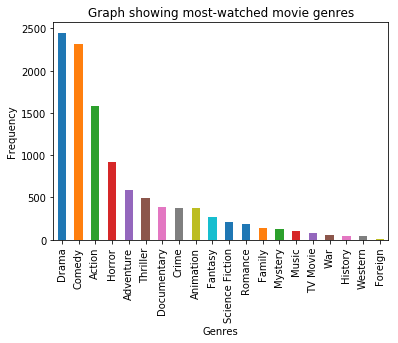

In [25]:
split['genre_0'].value_counts().plot(kind='bar')
plt.title('Graph showing most-watched movie genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')

### From the chart above, we can see that the most-watched genre is "Drama", followed by "Comedy", and the least watched genre is "Foreign"

In [26]:
split['genre_1'].value_counts()

Drama              1615
Comedy              983
Thriller            960
Romance             704
Adventure           624
Action              541
Horror              489
Crime               449
Family              441
Science Fiction     328
Fantasy             301
Mystery             238
Animation           202
Music               183
History             156
Documentary          75
Foreign              62
War                  53
Western              43
TV Movie             29
Name: genre_1, dtype: int64

Text(0,0.5,'Frequency')

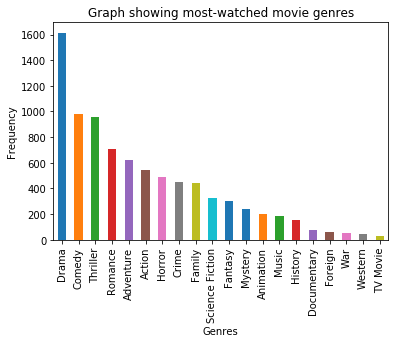

In [27]:
split['genre_1'].value_counts().plot(kind='bar')
plt.title('Graph showing most-watched movie genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')

### From the chart above, we can see that the most-watched genre of movies is "Drama", followed by "Comedy", and the least-watched genre is "TV Movie".

In [28]:
split['genre_2'].value_counts()

Thriller           886
Romance            583
Drama              544
Science Fiction    399
Family             398
Comedy             387
Crime              350
Mystery            288
Action             198
Fantasy            188
Horror             186
Adventure          183
War                 94
History             88
Animation           78
Music               76
Foreign             69
Western             39
TV Movie            19
Documentary          8
Name: genre_2, dtype: int64

Text(0,0.5,'Frequency')

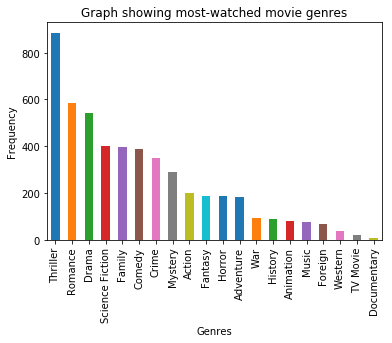

In [29]:
split['genre_2'].value_counts().plot(kind='bar')
plt.title('Graph showing most-watched movie genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')

### From the chart above, we can see that the most-watched genre of movie is "Thriller", followed by "Romance", and the least-watched genre is "Documentary".

In [30]:
split['genre_3'].value_counts()

Thriller           448
Science Fiction    215
Romance            194
Family             177
Crime              152
Drama              123
Mystery            121
Fantasy            108
Comedy              81
Adventure           62
Action              41
War                 41
History             39
Foreign             37
Horror              36
Music               32
Western             31
TV Movie            27
Animation            6
Documentary          3
Name: genre_3, dtype: int64

Text(0,0.5,'Frequency')

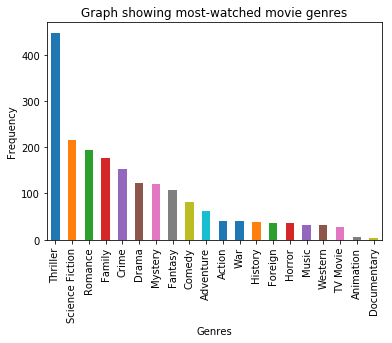

In [31]:
split['genre_3'].value_counts().plot(kind='bar')
plt.title('Graph showing most-watched movie genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')

### From the chart above, we can see that the most-watched genre of movies is "Thriller", followed by "Science Fiction", and the least-watched genre of movies is "Documentary".

According to the value counts, the genres that are most watched year after year are in the following order: Drama, Comedy, Thriller, Action, Romance, Horror, Adventure, Crime, Family, Science Fiction, Fantasy, Mystery, Animation, Documentary, Music, History, War, Foreign, Western and TV Movie.

### Question 2: What are the parameters that contribute to increase in Revenue?


Text(0,0.5,'Frequency')

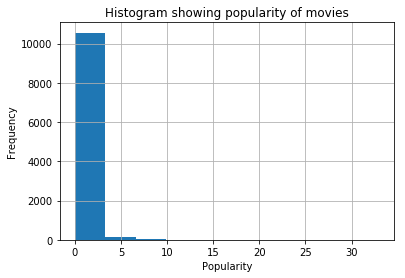

In [32]:
m_df['popularity'].hist();
plt.title('Histogram showing popularity of movies')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

This distribution is right_skewed

Text(0,0.5,'Frequency')

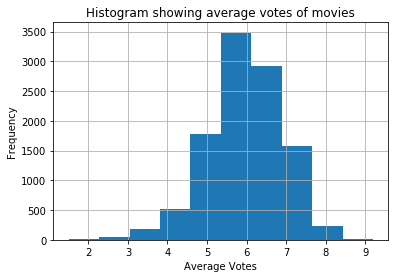

In [33]:
m_df['vote_average'].hist();
plt.title('Histogram showing average votes of movies')
plt.xlabel('Average Votes')
plt.ylabel('Frequency')

This distribution is left-skewed

Text(0,0.5,'Frequency')

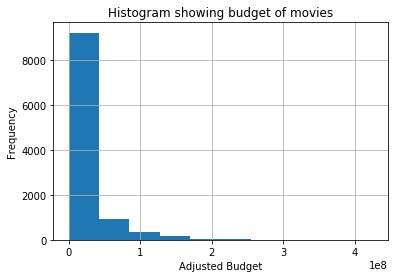

In [34]:
m_df['budget_adj'].hist();
plt.title('Histogram showing budget of movies')
plt.xlabel('Adjusted Budget')
plt.ylabel('Frequency')

This distribution is right-skewed

Text(0.5,1,'Plot showing relationship between budget and revenue of movies')

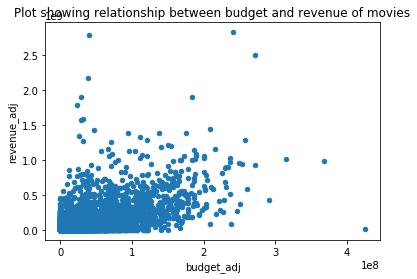

In [35]:
m_df.plot(x = 'budget_adj', y = 'revenue_adj', kind = 'scatter')
plt.title('Plot showing relationship between budget and revenue of movies')

This shows a weakly positive correlation with possible outliers, indicating a weak relationship between the revenue and the budget

Text(0.5,1,'Plot showing relationship between Average votes and revenue of movies')

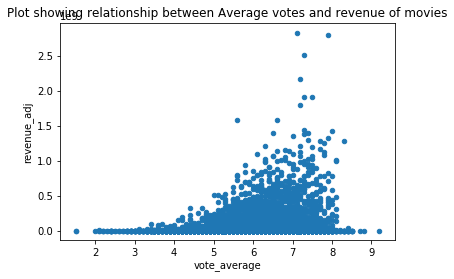

In [36]:
m_df.plot(x = 'vote_average', y = 'revenue_adj', kind = 'scatter')
plt.title('Plot showing relationship between Average votes and revenue of movies')

This indicates a positive relationship between the revnue and the average votes. As the vote increases, the revenue increases.

Text(0.5,1,'Plot showing relationship between popularity and revenue of movies')

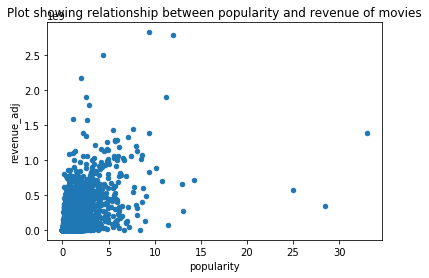

In [37]:
m_df.plot(x = 'popularity', y = 'revenue_adj', kind = 'scatter')
plt.title('Plot showing relationship between popularity and revenue of movies')

There is no relationship between revenue and popularity

Text(0.5,1,'Plot showing relationship between runtime and revenue of movies')

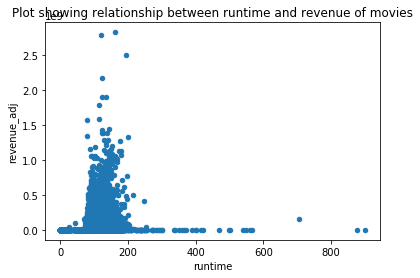

In [38]:
m_df.plot(x = 'runtime', y = 'revenue_adj', kind = 'scatter')
plt.title('Plot showing relationship between runtime and revenue of movies')

This shows a weakly negative correlation, indicating a weak negative relationship between the runtime and the revenue.

### Question 3:  What kinds of properties are associated with movies that have high revenues?


In [39]:
# We can get the movies that have more than 50% of the adjusted revenues
top_movies = m_df.query('revenue_adj > revenue_adj.mean()')
top_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2253.000000,2253.000000,2.253000e+03,2.253000e+03,2253.000000,2253.000000,2253.000000,2253.000000,2.253000e+03,2.253000e+03
mean,31943.112739,1.560727,4.929208e+07,1.769674e+08,113.071904,773.903684,6.306924,1999.193076,5.841920e+07,2.288530e+08
std,60175.862105,1.770137,4.896396e+07,2.048709e+08,24.094290,1052.512413,0.733841,12.466492,5.053944e+07,2.463271e+08
min,11.000000,0.010335,0.000000e+00,7.100000e+06,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,5.195037e+07
25%,2148.000000,0.669137,1.500000e+07,6.213422e+07,98.000000,164.000000,5.800000,1992.000000,2.206667e+07,8.414797e+07
50%,9907.000000,1.104510,3.500000e+07,1.074588e+08,110.000000,379.000000,6.300000,2002.000000,4.488090e+07,1.426587e+08
75%,21736.000000,1.839325,7.000000e+07,2.075157e+08,124.000000,930.000000,6.800000,2009.000000,8.112519e+07,2.694012e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


### CONCLUSIONS

From the investigation and exploration of this data set, i have been able to detemine the genres of movies that are most watched year after year. The results are shown above. I have also been able to explore the relationships between the adjusted revenue and some of the parameters to determine the contributions of those parameters to the revenue generation. Lastly, i was able to determine the features that are associated with the top-grossing movies. The results are shown above.
After this analysis process, we can conclude that:

### PROFITABLE MOVIES HAVE CRITERIA

1) Genre must be: Action, Comedy, Thriller, Drama, Romance.
2) The average duration of the movie must be 114 minutes.

### LIMITATIONS
 The observation before the budget and revenue columns do not have any currency unit or documentation representing what exact currency mechanism was used. It might be a possibility of different movies having budgets in different currency units. Moreover, we are not sure if the data provided to us is complete, correct and up-to-date. Dropping or discarding the rows with missing values also affected the overall analysis. The result of this analysis process may not be completely error free, but following these criteria can increase the probability of a movie to become profitable.


In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0